In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder

DS = pd.read_csv('train.csv')

DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
myImputer = SimpleImputer (strategy= 'median')
DS.Age = myImputer.fit_transform(DS['Age'].values.reshape(-1,1))
myImputer = SimpleImputer (strategy= 'most_frequent')
DS.Embarked = myImputer.fit_transform(DS['Embarked'].values.reshape(-1,1))
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


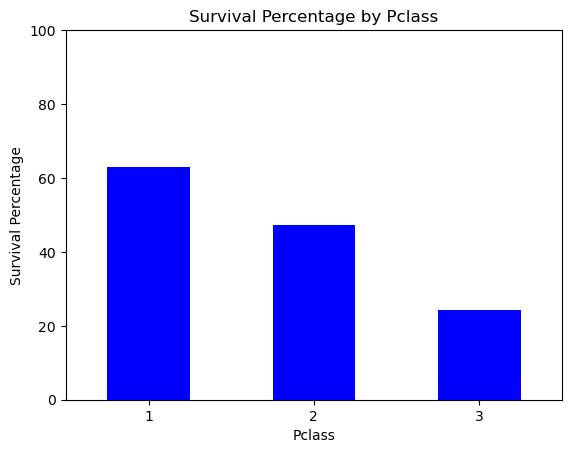

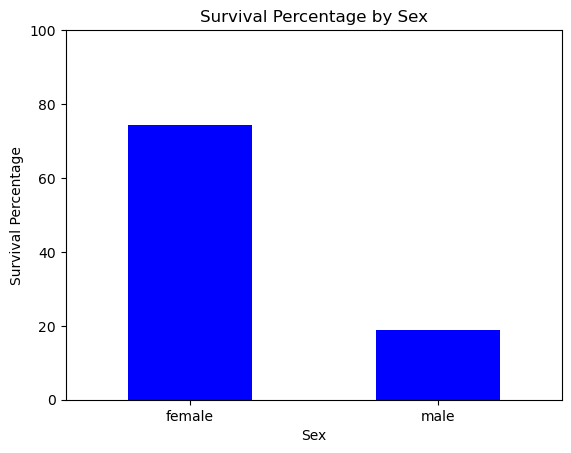

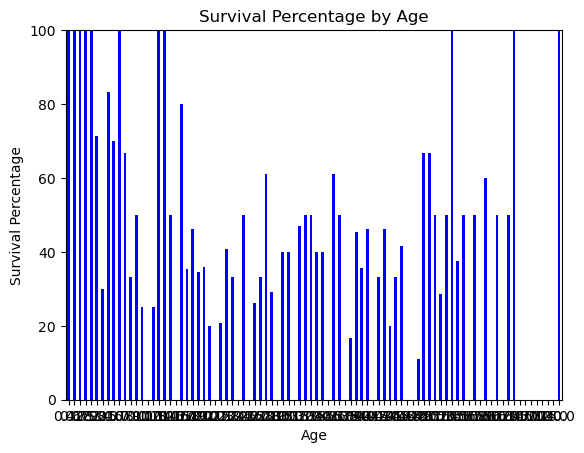

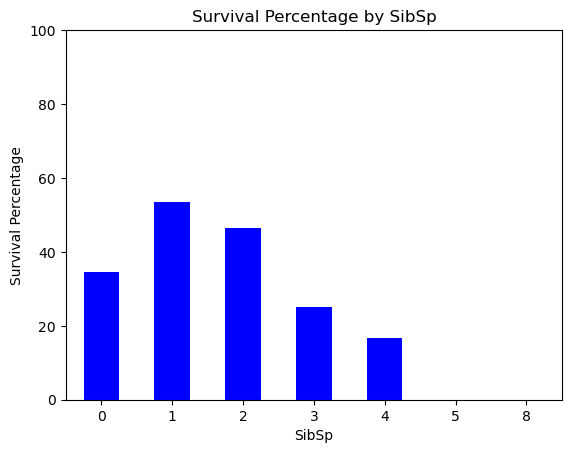

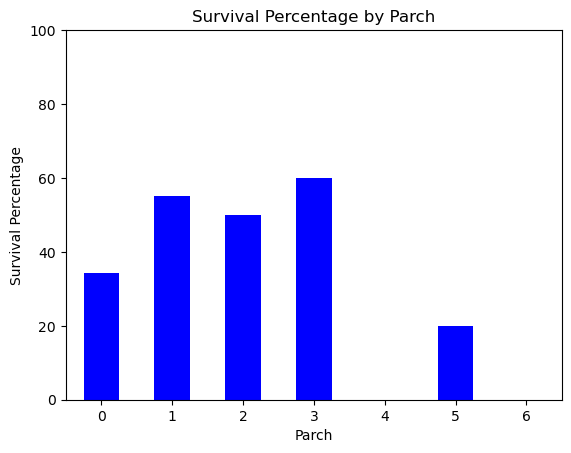

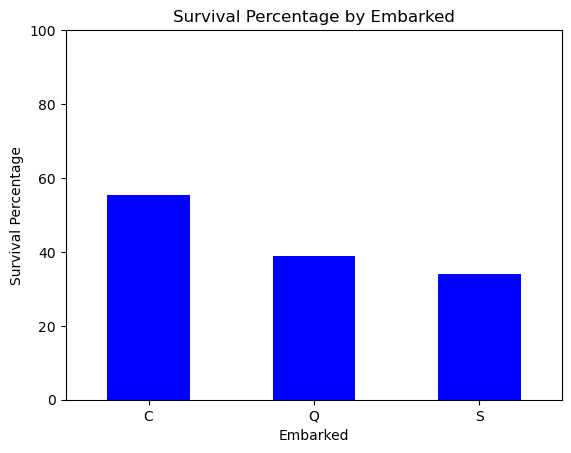

In [3]:
# Рассчитываем процент выживаемости для каждого параметра
survival_percentages = {}
for column in DS.columns:
    if column not in ['Survived', 'Name', 'PassengerId', 'Ticket', 'Fare', 'Cabin'] :
        survival_percentages[column] = DS.groupby(column)['Survived'].mean() * 100

# Создание графиков
for parameter, percentages in survival_percentages.items():
    plt.figure()
    percentages.plot(kind='bar', color='blue')
    plt.xlabel(parameter)
    plt.ylabel('Survival Percentage')
    plt.title(f'Survival Percentage by {parameter}')
    plt.ylim([0, 100])
    plt.xticks(rotation=0)
    plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

s = {'male':0,'female':1}
DS['Sex'] = DS['Sex'].apply(lambda x:s[x])
e = {'C':0,'Q':1,'S':2}
DS['Embarked'] = DS['Embarked'].apply(lambda x:e[x])

# Рассмотрим точноть для разных столбцов
colum_target = ['Survived']
colum_param_0 = ['Pclass','Sex','Age']
colum_param_1 = ['Pclass','Sex','Age','SibSp']
colum_param_2 = ['Pclass','Sex','Age','SibSp','Parch']
colum_param_3 = ['Pclass','Sex','Age','SibSp','Embarked']
colum_param_4 = ['Pclass','Sex','Age','Parch']
colum_param_5 = ['Pclass','Sex','Age','Parch','Embarked']
colum_param_6 = ['Pclass','Sex','Age','Embarked']
colum_param_7 = ['Pclass','Sex','Age','SibSp','Parch','Embarked']


C_T = [colum_param_0, colum_param_1, colum_param_2, colum_param_3, colum_param_4, colum_param_5, colum_param_6, colum_param_7]

y = DS[colum_target]

# Создание списка для хранения результатов
results = []

# Список значений k, которые мы хотим исследовать
k_values = range(1, 10)

for i in range(15):
    for N in C_T:
        X = DS[N]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
                
        # Создание и обучение модели
        knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
        knn.fit(X_train, y_train)
        
        # Прогнозирование
        knn.predict(X_test)
        
        # Оценка качества классификации
        accuracy = knn.score(X_test,y_test)
        
        # Добавление результатов в список
        found = False
        for i, (first, second) in enumerate(results):
            if first == N:
                results[i] = (first, second + accuracy)
                found = True
                break

        if not found:
            results.append((N, accuracy))

for i, (first, second) in enumerate(results):
    results[i] = (first, second/15)

# Вывод точности
for i in results:
    print (i)

C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

(['Pclass', 'Sex', 'Age'], 0.7721755368814194)
(['Pclass', 'Sex', 'Age', 'SibSp'], 0.754435107376284)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], 0.7566760037348275)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], 0.7523809523809522)
(['Pclass', 'Sex', 'Age', 'Parch'], 0.7521942110177403)
(['Pclass', 'Sex', 'Age', 'Parch', 'Embarked'], 0.7432306255835667)
(['Pclass', 'Sex', 'Age', 'Embarked'], 0.7436041083099906)
(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], 0.7535014005602243)


C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi